# Example solar power forecast

Here's a quick example of a solar power forecast.

## Environment setup:
Using miniforge:
```
conda create --name energy_forecasting_env2 python=3.11 -y
conda activate energy_forecasting_env2
conda install -c conda-forge herbie-data -y
pip install pvlib ipykernel jupyter

```

If you get this error:
```python
RuntimeError: Cannot find the ecCodes library
```

Try 

```
conda install -c conda-forge eccodes
conda update -c conda-forge python-eccodes
```

in your environment in miniforge.

In [1]:
import matplotlib.pyplot as plt
from pv_model import model_pv_power
from forecast_solar import get_solar_forecast

In [2]:
# specs for a generic 100 MW solar plant, single-axis tracking, thin-film (truetracking)
latitude = 33.5
longitude = -86.8
mount_type = 'single-axis'
gcr = 0.4
nameplate_dc = 120
nameplate_ac = 100
dc_loss_fraction = 0.1
gamma_pdc = -0.003
shade_loss_model = 'linear'
backtrack = False
max_tracker_angle = 60

In [3]:
# get an intra-day forecast based on NOAA GFS
init_date = '2024-06-05 6:00'
resource_data_gfs = get_solar_forecast(
    latitude,
    longitude,
    init_date,
    length_hours=18, # 18 hours are included in the forecast
    lead_time_hours=3, # forecast starts 3 hours out from the init_date
    model='gfs',
)
resource_data_gfs['albedo'] = 0.2 # set a value for albedo

✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 06:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 06:00 UTC F04 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 06:00 UTC F05 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 06:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 06:00 UTC F07 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 06:00 UTC F08 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 06:00 UTC F09 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 06:00 UTC F10 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 06:00 UTC F11 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 06:00 UTC F12 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 06:00 UTC F13 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 06:00 UTC F14 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 06:00 UTC F15 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 06:00 UTC F16 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 06:00 UTC F17 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 06:00 UTC F18 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 06:00 UTC F19 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 06:00 UTC F20 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.


In [4]:
resource_data_gfs.head()

,point,temp_air,wind_speed,ghi_csi,ghi,dni,dhi,ghi_clear,albedo
valid_time,,,,,,,,,
2024-06-05 09:30:00+00:00,0,21.077648,1.929231,0.000000,0.000000,0.000000,0.000000,NaN,0.2
2024-06-05 10:30:00+00:00,0,20.797787,1.655612,0.818729,0.000000,0.000000,0.000000,0.000000,0.2
2024-06-05 11:30:00+00:00,0,20.907446,1.959852,0.693885,84.966977,87.270128,71.066200,122.451151,0.2
2024-06-05 12:30:00+00:00,0,21.614117,2.556246,0.422213,141.905491,19.602340,134.851698,336.099409,0.2
2024-06-05 13:30:00+00:00,0,23.127867,3.104542,0.656015,356.375947,205.399208,243.335364,543.243465,0.2


In [5]:
# model power using the forecasted resource data
power_ac_forecast_gfs, resource_data_gfs_updated = model_pv_power(
    resource_data=resource_data_gfs,
    latitude=latitude,
    longitude=longitude,
    mount_type=mount_type,
    gcr=gcr,
    nameplate_dc=nameplate_dc,
    nameplate_ac=nameplate_ac,
    dc_loss_fraction=dc_loss_fraction,
    gamma_pdc=gamma_pdc,
    shade_loss_model=shade_loss_model,
    backtrack=backtrack,
    max_tracker_angle=max_tracker_angle,
)

<Axes: xlabel='valid_time'>

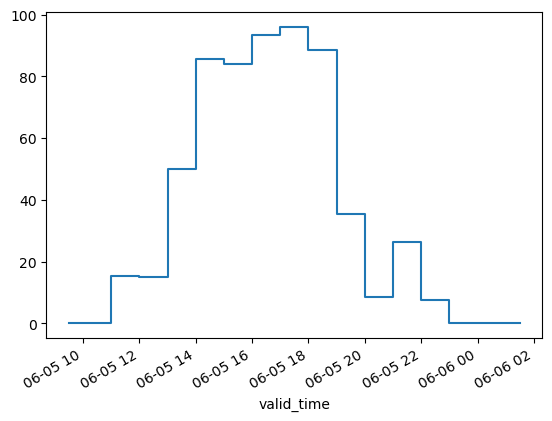

In [6]:
# plot the result
power_ac_forecast_gfs.plot(drawstyle='steps-mid')

In [7]:
# get an intra-day forecast based on ECMWF IFS
init_date = '2024-06-05 6:00'
resource_data_ifs = get_solar_forecast(
    latitude,
    longitude,
    init_date,
    length_hours=18, # 18 hours are included in the forecast
    lead_time_hours=3, # forecast starts 3 hours out from the init_date
    model='ifs',
)
resource_data_ifs['albedo'] = 0.2 # set a value for albedo

✅ Found ┊ model=ifs ┊ product=scda ┊ 2024-Jun-05 06:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=ifs ┊ product=scda ┊ 2024-Jun-05 06:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=ifs ┊ product=scda ┊ 2024-Jun-05 06:00 UTC F09 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=ifs ┊ product=scda ┊ 2024-Jun-05 06:00 UTC F12 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=ifs ┊ product=scda ┊ 2024-Jun-05 06:00 UTC F15 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=ifs ┊ product=scda ┊ 2024-Jun-05 06:00 UTC F18 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=ifs ┊ product=scda ┊ 2024-Jun-05 06:00 UTC F21 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\willh\miniforge3\envs\energy_forecasting_env\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.


In [8]:
# model power using the forecasted resource data
power_ac_forecast_ifs, resource_data_ifs_updated = model_pv_power(
    resource_data=resource_data_ifs,
    latitude=latitude,
    longitude=longitude,
    mount_type=mount_type,
    gcr=gcr,
    nameplate_dc=nameplate_dc,
    nameplate_ac=nameplate_ac,
    dc_loss_fraction=dc_loss_fraction,
    gamma_pdc=gamma_pdc,
    shade_loss_model=shade_loss_model,
    backtrack=backtrack,
    max_tracker_angle=max_tracker_angle,
)

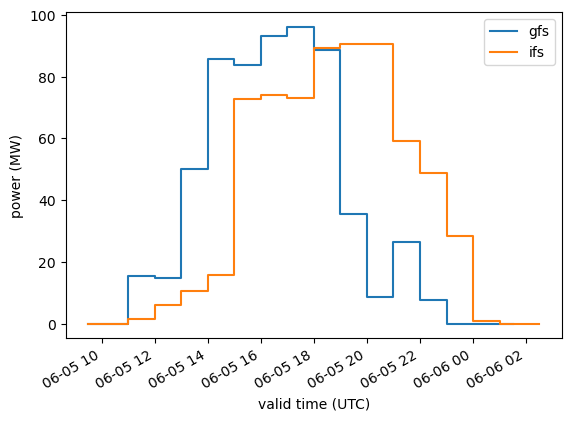

In [ ]:
# plot the result
power_ac_forecast_gfs.plot(drawstyle='steps-mid', label='gfs')
power_ac_forecast_ifs.plot(drawstyle='steps-mid', label='ifs')
plt.legend()
plt.ylabel('power (MW)')
plt.xlabel('valid time (UTC)')
plt.show()